## 10.1	数据收集

In [1]:
import numpy as np
import pandas as pd
# 从文件中读取链家网站上采集的北京租房数据
file_data = pd.read_csv(r'C:\Users\itcast\Desktop\lianjia_houses.csv', encoding='gbk')
file_data.head()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500


In [2]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   区域       8223 non-null   object
 1   小区名称     8223 non-null   object
 2   户型       8223 non-null   object
 3   面积(㎡)    8223 non-null   object
 4   价格(元/月)  8223 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 321.3+ KB


In [3]:
## 总结：
# （1）租房数据中总共有8223行5列数据
# （2）价格一列的类型是int64，可以直接参与算术运算
# （3）所有列的非空值的数量相等，都是8223，说明没有缺失值

## 10.2	数据处理

### 10.3.1	重复值检测与处理

In [4]:
# 检测租房数据是否有重复值
dup_value = file_data.duplicated()
file_data[dup_value==True]

,区域,小区名称,户型,面积(㎡),价格(元/月)
65,东城,金鱼池东区,2室1厅,66.46平米,6000
66,东城,凯德华玺,2房间1卫,73.86平米,13000
67,东城,沙井胡同,2室1厅,25.15平米,7900
68,东城,沙井胡同,1室1厅,12.3平米,4200
69,东城,安贞苑50号院,2室1厅,65.82平米,6900
...,...,...,...,...,...
8196,顺义,仓上小区,3室1厅,108.03平米,3900
8197,顺义,石园东区,2室1厅,91.93平米,4100
8198,顺义,裕龙三区,1室1厅,69.04平米,3800
8199,顺义,建新北区,2室1厅,50.04平米,3600


In [5]:
# 删除重复值，重新分配行索引
file_data = file_data.drop_duplicates(ignore_index=True)
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500
...,...,...,...,...,...
5768,顺义,怡馨家园,3室1厅,114.03平米,5500
5769,顺义,旭辉26街区,4房间2卫,59平米,5000
5770,顺义,前进花园玉兰苑,3室1厅,92.41平米,5800
5771,顺义,双裕小区,2室1厅,71.81平米,4200


### 10.3.2	数据类型转换

In [6]:
new_arr = np.array([])
# 取出面积一列数据，去掉末尾的中文字符“”
area_data = file_data['面积(㎡)'].values
for i in area_data:
    new_arr = np.append(new_arr, i[:-2])
# 通过astype()方法将值转换为float64类型
new_arr = new_arr.astype(np.float64)
file_data.loc[:, '面积(㎡)'] = new_arr
file_data.tail()

C:\Users\itcast\AppData\Local\Temp\ipykernel_10272\1618624128.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  file_data.loc[:, '面积(㎡)'] = new_arr


,区域,小区名称,户型,面积(㎡),价格(元/月)
5768,顺义,怡馨家园,3室1厅,114.03,5500
5769,顺义,旭辉26街区,4房间2卫,59.00,5000
5770,顺义,前进花园玉兰苑,3室1厅,92.41,5800
5771,顺义,双裕小区,2室1厅,71.81,4200
5772,顺义,樱花园二区,1室1厅,35.43,2700


In [7]:
# 获取“户型”一列数据
housetype_data = file_data['户型']
temp_list = []
for i in housetype_data:
    # 把“房间”替换为“室”
    new_info = i.replace('房间', '室')
    temp_list.append(new_info)
file_data.loc[:, '户型'] = temp_list
file_data.tail()

,区域,小区名称,户型,面积(㎡),价格(元/月)
5768,顺义,怡馨家园,3室1厅,114.03,5500
5769,顺义,旭辉26街区,4室2卫,59.00,5000
5770,顺义,前进花园玉兰苑,3室1厅,92.41,5800
5771,顺义,双裕小区,2室1厅,71.81,4200
5772,顺义,樱花园二区,1室1厅,35.43,2700


## 10.3	数据分析与展现

### 10.4.1	房源数量分析

In [8]:
new_df = pd.DataFrame({'区域':file_data['区域'].unique(), '数量':[0]*13})
new_df

,区域,数量
0,东城,0
1,丰台,0
2,亦庄开发区,0
3,大兴,0
4,房山,0
5,昌平,0
6,朝阳,0
7,海淀,0
8,石景山,0
9,西城,0


In [10]:
# 按“区域”列分组，并统计每个分组的数量
groupy_area = file_data.groupby(by='区域').count()
new_df['数量'] = groupy_area.values
new_df = new_df.sort_values(by=['数量'], ascending=False)
new_df

,区域,数量
5,昌平,1597
12,顺义,605
7,海淀,577
4,房山,477
0,东城,442
10,通州,362
3,大兴,347
2,亦庄开发区,297
8,石景山,285
6,朝阳,282


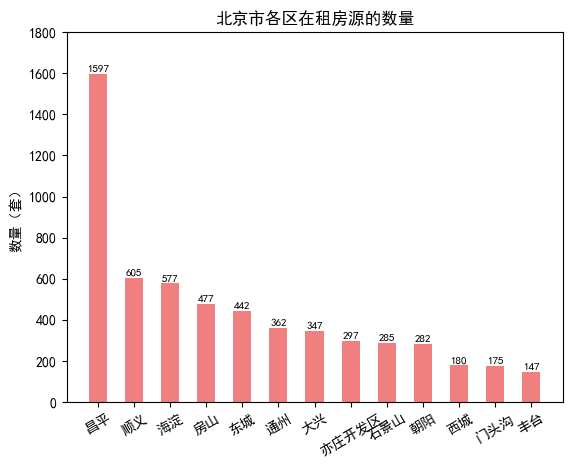

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
house_region = new_df['区域']
house_count = new_df['数量']
x = np.arange(house_region.values.size)
bar_rect = plt.bar(x, house_count, tick_label=house_region.values.tolist(), 
                   width=0.5, color='lightcoral') 
plt.title("北京市各区在租房源的数量")
plt.ylim(0, 1800)
plt.ylabel("数量（套）")
# 添加注释文本
def autolabel(rects):
    """在每个柱形上方添加注释文本"""
    for rect in rects:
        rect_height = rect.get_height()     # 获取每个柱形的高度
        rect_x = rect.get_x()               # 获取每个柱形的x值
        rect_width = rect.get_width()       # 获取每个柱形的宽度
        plt.text(rect_x + rect_width / 2, rect_height + 5, 
                 s='{}'.format(rect_height),
                 ha='center', va='bottom', fontsize=8)
autolabel(bar_rect)
# 旋转x轴刻度标签的角度
plt.xticks(rotation=30)
plt.show()

### 10.4.2	户型数量分析

In [11]:
# 定义函数，用于计算各户型的数量
def all_house(arr):
    arr = np.array(arr)
    key = np.unique(arr)
    result = {}
    for k in key:
        mask = (arr == k)
        arr_new = arr[mask]
        v = arr_new.size
        result[k] = v
    return result
house_array = file_data['户型']
house_info = all_house(house_array)
house_info

{'0室0厅': 1,
 '1室0卫': 10,
 '1室0厅': 244,
 '1室1卫': 126,
 '1室1厅': 844,
 '1室2厅': 13,
 '2室0卫': 1,
 '2室0厅': 23,
 '2室1卫': 120,
 '2室1厅': 2249,
 '2室2卫': 22,
 '2室2厅': 265,
 '2室3厅': 1,
 '3室0卫': 3,
 '3室0厅': 12,
 '3室1卫': 92,
 '3室1厅': 766,
 '3室2卫': 48,
 '3室2厅': 489,
 '3室3卫': 1,
 '3室3厅': 10,
 '4室1卫': 15,
 '4室1厅': 58,
 '4室2卫': 24,
 '4室2厅': 191,
 '4室3卫': 5,
 '4室3厅': 9,
 '4室5厅': 2,
 '5室0卫': 1,
 '5室0厅': 1,
 '5室1卫': 3,
 '5室1厅': 7,
 '5室2卫': 7,
 '5室2厅': 49,
 '5室3卫': 3,
 '5室3厅': 24,
 '5室4厅': 1,
 '5室5厅': 1,
 '6室0厅': 1,
 '6室1卫': 1,
 '6室1厅': 1,
 '6室2厅': 5,
 '6室3卫': 2,
 '6室3厅': 6,
 '6室4卫': 2,
 '7室1厅': 1,
 '7室2厅': 2,
 '7室3厅': 3,
 '7室4厅': 1,
 '8室4厅': 2,
 '9室1厅': 2,
 '9室2厅': 1,
 '9室5厅': 2}

In [12]:
# 使用列表推导式过滤数量大于50的户型
house_type = dict((key, value) for key, value in house_info.items() if value > 50)
show_houses = pd.DataFrame({'户型':[x for x in  house_type.keys()],
                            '数量':[x for x in house_type.values()]})
show_houses

,户型,数量
0,1室0厅,244
1,1室1卫,126
2,1室1厅,844
3,2室1卫,120
4,2室1厅,2249
5,2室2厅,265
6,3室1卫,92
7,3室1厅,766
8,3室2厅,489
9,4室1厅,58


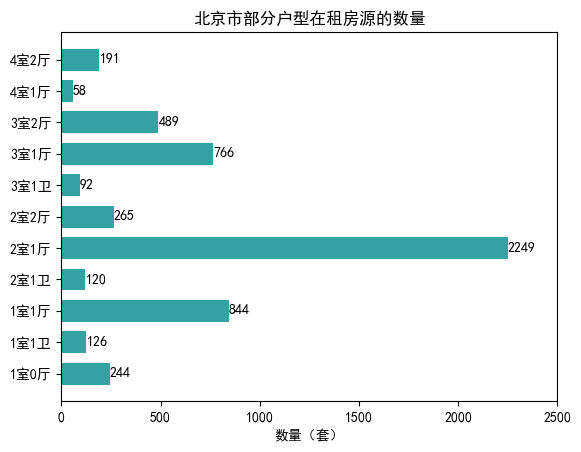

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
house_type = show_houses['户型']
house_type_num = show_houses['数量']
y = np.arange(house_type.values.size)
plt.barh(y, house_type_num, height=0.7, color='darkcyan', alpha=0.8)     
plt.yticks(y, house_type)
plt.xlim(0, 2500)
plt.xlabel("数量（套）")
plt.title("北京市部分户型在租房源的数量")
for x, y in enumerate(house_type_num):
    plt.text(y + 0.2, x - 0.1, '%s' % y)
plt.show()

### 10.4.3	房源平均租金分析

In [24]:
# 新建一个DataFrame对象，房租总金额和总面积列的初始值为0
df_all = pd.DataFrame({'区域':file_data['区域'].unique(), '房租总金额':[0]*13,
                       '总面积(㎡)':[0]*13})
df_all

       区域  房租总金额  总面积(㎡)
0      东城      0       0
1      丰台      0       0
2   亦庄开发区      0       0
3      大兴      0       0
4      房山      0       0
5      昌平      0       0
6      朝阳      0       0
7      海淀      0       0
8     石景山      0       0
9      西城      0       0
10     通州      0       0
11    门头沟      0       0
12     顺义      0       0


In [25]:
# 求总金额和总面积
sum_price = file_data['价格(元/月)'].groupby(file_data['区域']).sum()
sum_area = file_data['面积(㎡)'].groupby(file_data['区域']).sum()
df_all['房租总金额'] = sum_price.values
df_all['总面积(㎡)'] = sum_area.values
df_all

       区域     房租总金额     总面积(㎡)
0      东城   3945550   27353.99
1      丰台   4404893   50922.79
2   亦庄开发区   1318400   15995.53
3      大兴   2286950   35884.15
4      房山    726750   15275.41
5      昌平   2521515   35972.92
6      朝阳  20281396  166921.72
7      海淀   7279350   57210.39
8     石景山   1156500   13956.67
9      西城   5636975   37141.64
10     通州   2719600   46625.23
11    门头沟   1048300   20258.20
12     顺义   2190900   33668.97


In [26]:
# 计算各区域每平米房租价格,并保留两位小数
df_all['每平米租金(元)'] = round(df_all['房租总金额']/ df_all['总面积(㎡)'], 2)
df_all

       区域     房租总金额     总面积(㎡)  每平米租金(元)
0      东城   3945550   27353.99    144.24
1      丰台   4404893   50922.79     86.50
2   亦庄开发区   1318400   15995.53     82.42
3      大兴   2286950   35884.15     63.73
4      房山    726750   15275.41     47.58
5      昌平   2521515   35972.92     70.09
6      朝阳  20281396  166921.72    121.50
7      海淀   7279350   57210.39    127.24
8     石景山   1156500   13956.67     82.86
9      西城   5636975   37141.64    151.77
10     通州   2719600   46625.23     58.33
11    门头沟   1048300   20258.20     51.75
12     顺义   2190900   33668.97     65.07


In [28]:
# 合并new_df与df_all
df_merge = pd.merge(new_df, df_all)
df_merge

       区域    数量     房租总金额     总面积(㎡)  每平米租金(元)
0      昌平  1597   2521515   35972.92     70.09
1      顺义   605   2190900   33668.97     65.07
2      海淀   577   7279350   57210.39    127.24
3      房山   477    726750   15275.41     47.58
4      东城   442   3945550   27353.99    144.24
5      通州   362   2719600   46625.23     58.33
6      大兴   347   2286950   35884.15     63.73
7   亦庄开发区   297   1318400   15995.53     82.42
8     石景山   285   1156500   13956.67     82.86
9      朝阳   282  20281396  166921.72    121.50
10     西城   180   5636975   37141.64    151.77
11    门头沟   175   1048300   20258.20     51.75
12     丰台   147   4404893   50922.79     86.50


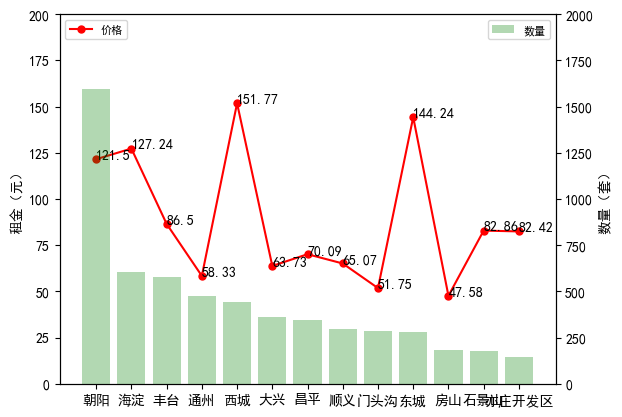

In [129]:
import matplotlib.ticker as mtick
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif']=['SimHei'] 
num = df_merge['数量']                 
price = df_merge['每平米租金(元)']
l = [i for i in range(num.values.size)]
region = df_merge['区域']
# 创建一个画布
fig = plt.figure()
# 创建一个与画布同等大小的绘图区域
ax1 = fig.add_subplot(111)
ax1.plot(l, price, marker='o', ms=5, color='r', label='价格')
for i,(_x,_y) in enumerate(zip(l,price)):
    plt.text(_x, _y, price[i], color='black', fontsize=10)  
ax1.set_ylim([0, 200])
ax1.set_ylabel('租金（元）')
# 添加图例，设置图例的位置和文本字体大小
plt.legend(prop={'size': 8}, loc='upper left')
# 生成另一个与ax1共享x轴的绘图区域
ax2 = ax1.twinx()
ax2.bar(l, num, alpha=0.3, color='green', label='数量')
ax2.set_ylabel('数量（套）')
ax2.set_ylim([0, 2000])  
plt.legend(prop={'size': 8}, loc="upper right")
plt.xticks(l, region)
plt.show()

### 10.4.4	房源面积区间分析

In [12]:
# 查看房屋的最大面积和最小面积
print('房屋最大面积是%d平米'%(file_data['面积(㎡)'].max()))
print('房屋最小面积是%d平米'%(file_data['面积(㎡)'].min()))

房屋最大面积是1133平米
房屋最小面积是11平米


In [13]:
# 面积划分
area_divide = [1, 30, 50, 70, 90, 120, 140, 160, 1200]
area_cut = pd.cut(list(file_data['面积(㎡)']), area_divide)
area_cut_data = area_cut.describe()
area_cut_data

,counts,freqs
categories,,
"(1, 30]",41,0.007102
"(30, 50]",710,0.122986
"(50, 70]",1566,0.271263
"(70, 90]",1094,0.189503
"(90, 120]",1082,0.187424
"(120, 140]",381,0.065997
"(140, 160]",274,0.047462
"(160, 1200]",625,0.108263


In [ ]:
import numpy as np
area_percentage = (area_cut_data['freqs'].values) * 100
labels = ['30平米以下', '30-50平米', '50-70平米', '70-90平米', 
          '90-120平米','120-140平米','140-160平米','160平米以上']
# 绘制图像
# 标签是labels，
# 扇区显示的格式为百分比的形式，并保留两位小数
plt.pie(x=area_percentage, labels=labels, autopct='%.2f %%', pctdistance = 0.7)
# 显示图例，并设置图例显示到左上角位置
plt.legend(bbox_to_anchor=(1.08, 1))
plt.show()